In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA


In [ ]:
# !pip install xlrd
!pip install yellowbrick

In [1]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.pyplot import figure
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import scipy

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

# from yellowbrick.regressor import cooks_distance

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
df = pd.read_csv('/content/drive/Shareddrives/Fundamentals of DA/MIDTERM/Soures-code/dataset/data.csv')
df.head()

In [ ]:
df.isna().sum()

salary      0
pcsalary    0
sales       0
roe         0
pcroe       0
ros         0
indus       0
finance     0
consprod    0
utility     0
lsalary     0
lsales      0
dtype: int64

In [ ]:
df.describe()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1281.119617,13.282297,6923.793301,17.184211,10.800478,61.803828,0.320574,0.220096,0.287081,0.172249,6.950386,8.292265
std,1372.345308,32.633921,10633.271159,8.518509,97.219400,68.177052,0.467818,0.415306,0.453486,0.378503,0.566374,1.013160
min,223.000000,-61.000000,175.200000,0.500000,-98.900000,-58.000000,0.000000,0.000000,0.000000,0.000000,5.407172,5.165928
25%,736.000000,-1.000000,2210.300000,12.400000,-21.200000,21.000000,0.000000,0.000000,0.000000,0.000000,6.601230,7.700883
50%,1039.000000,9.000000,3705.200000,15.500000,-3.000000,52.000000,0.000000,0.000000,0.000000,0.000000,6.946014,8.217492
75%,1407.000000,20.000000,7177.000000,20.000000,19.500000,81.000000,1.000000,0.000000,1.000000,0.000000,7.249215,8.878636
max,14822.000000,212.000000,97649.900000,56.300000,977.000000,418.000000,1.000000,1.000000,1.000000,1.000000,9.603868,11.489140


In [6]:
# Split the features into categorical and numerical features
cat_features = ['indus', 'finance', 'consprod', 'utility']
num_features = [col for col in df.columns if col not in (cat_features)]

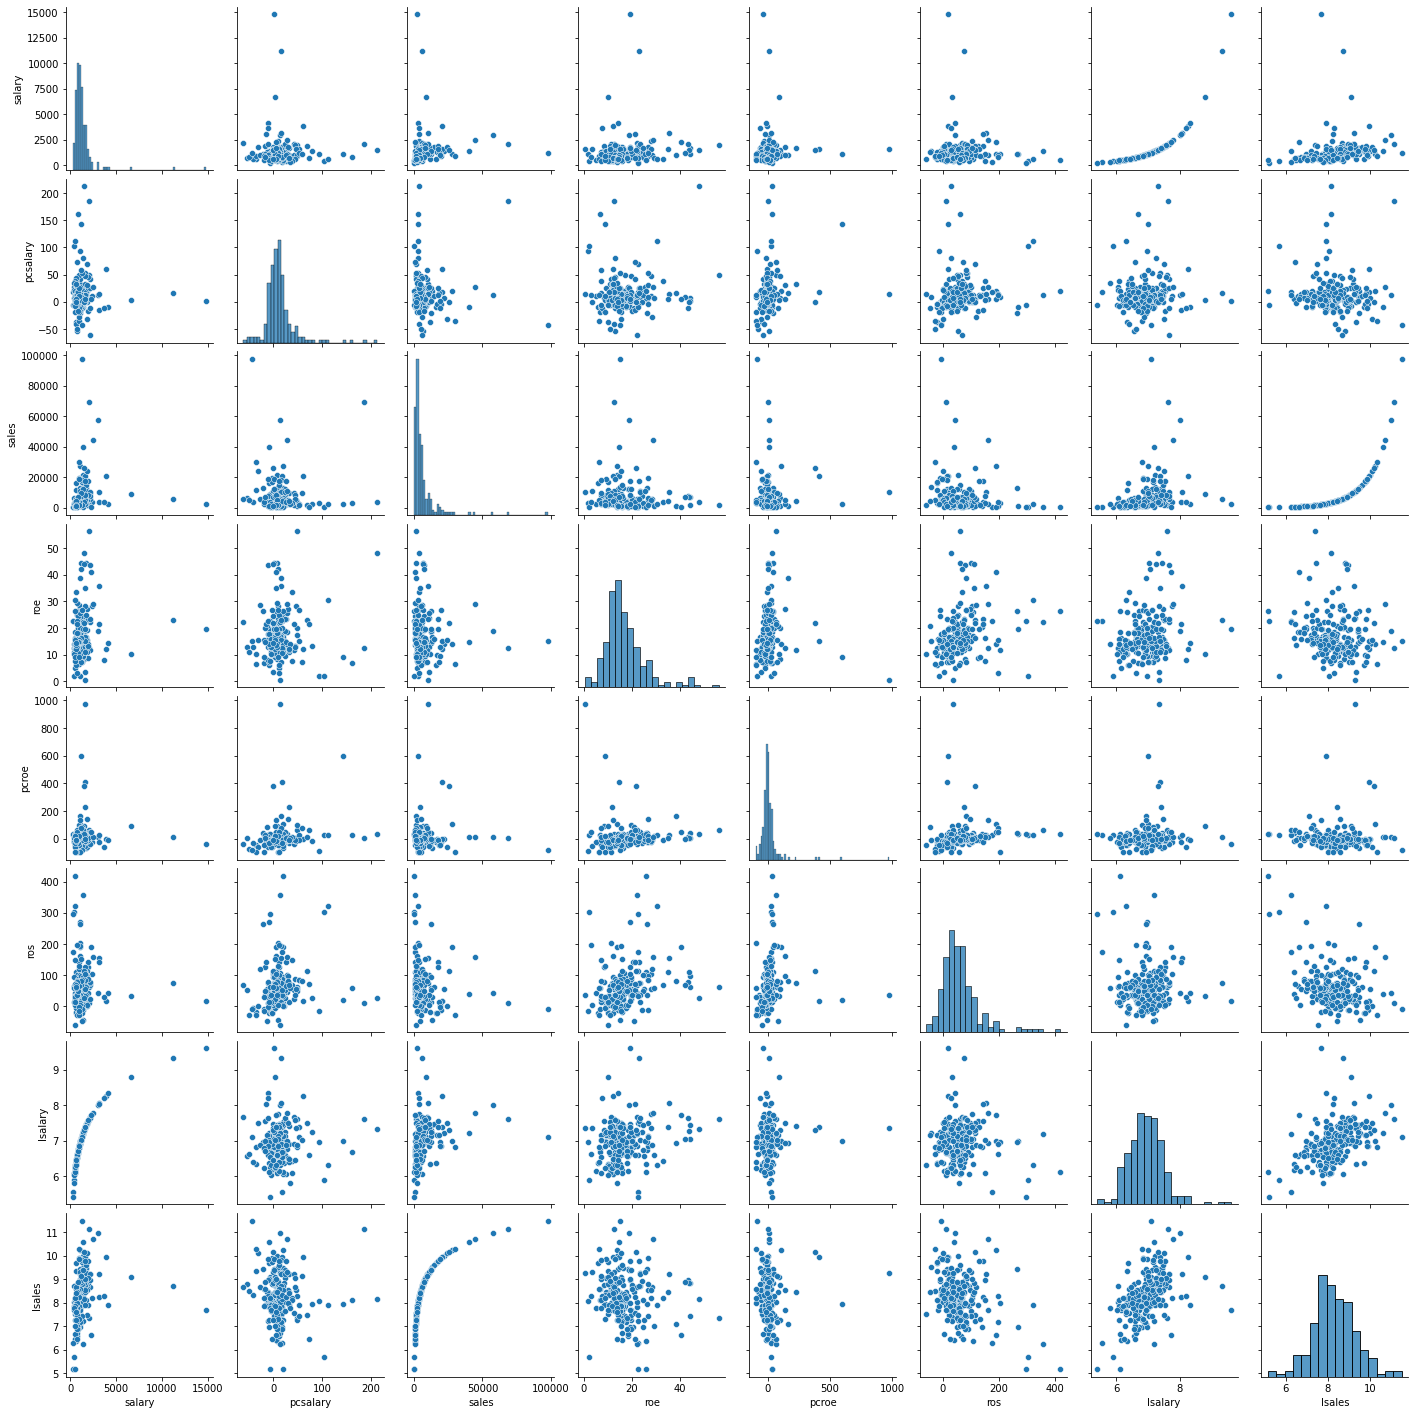

In [ ]:
sns.pairplot(df[num_features])

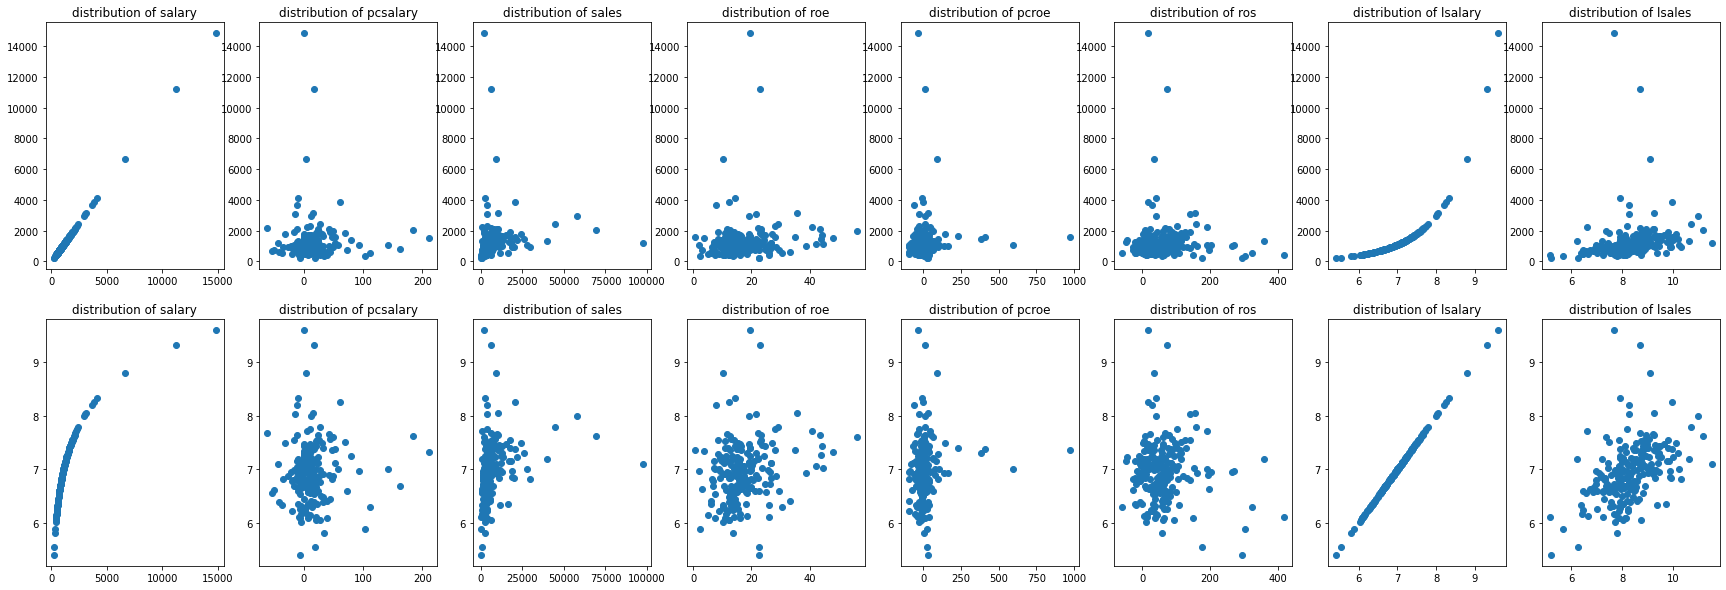

In [ ]:
plt.rcParams["figure.figsize"] = (30,10)
fig, axs = plt.subplots(2, 8)
cnt = 0
i = 0
for target in ['salary', 'lsalary']:
    for j in range(8):
        axs[i,j].scatter(df[num_features[cnt]], df[target])
        axs[i,j].set_title('distribution of '+ num_features[cnt])
        cnt += 1
    i += 1
    cnt = 0

IndexError: ignored

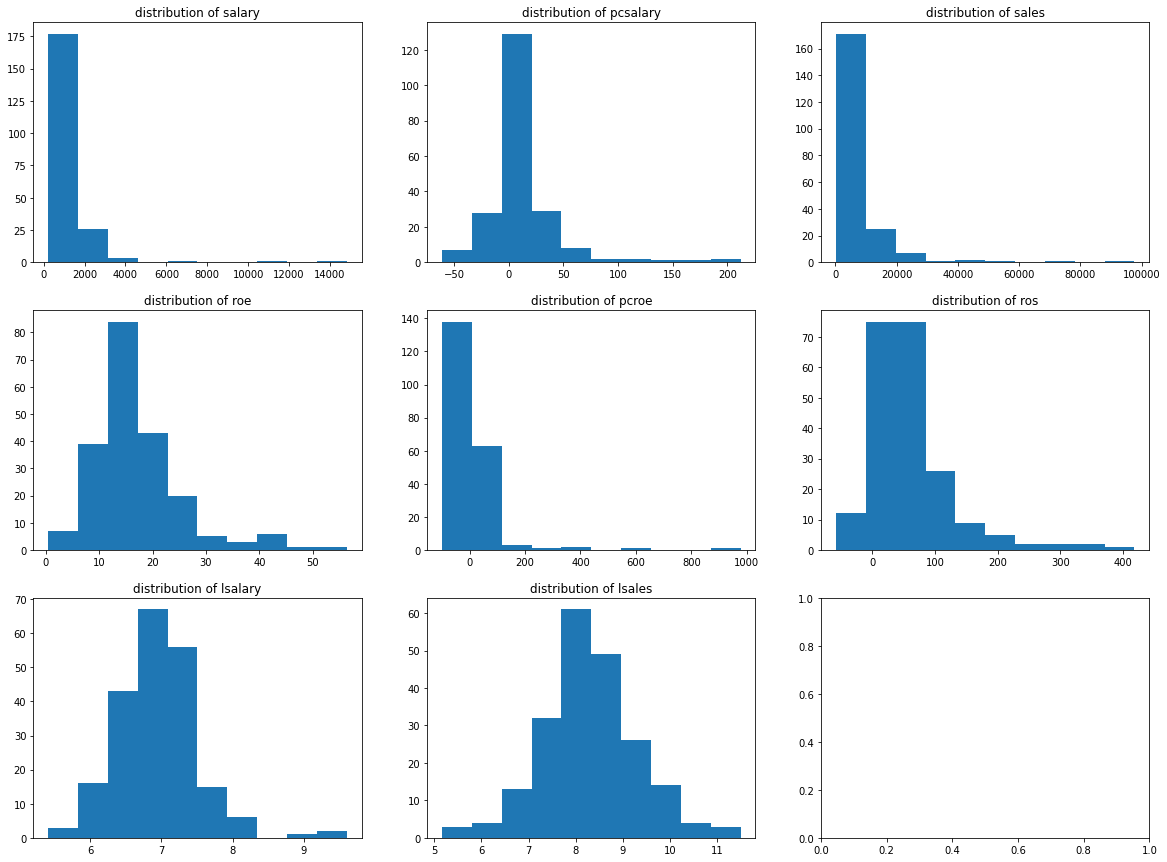

In [ ]:
# Plot the histogram of each numerical features

plt.rcParams["figure.figsize"] = (20,15)

fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i,j].hist(df[num_features[cnt]])
        axs[i,j].set_title('distribution of '+ num_features[cnt])
        cnt +=1

IndexError: list index out of range

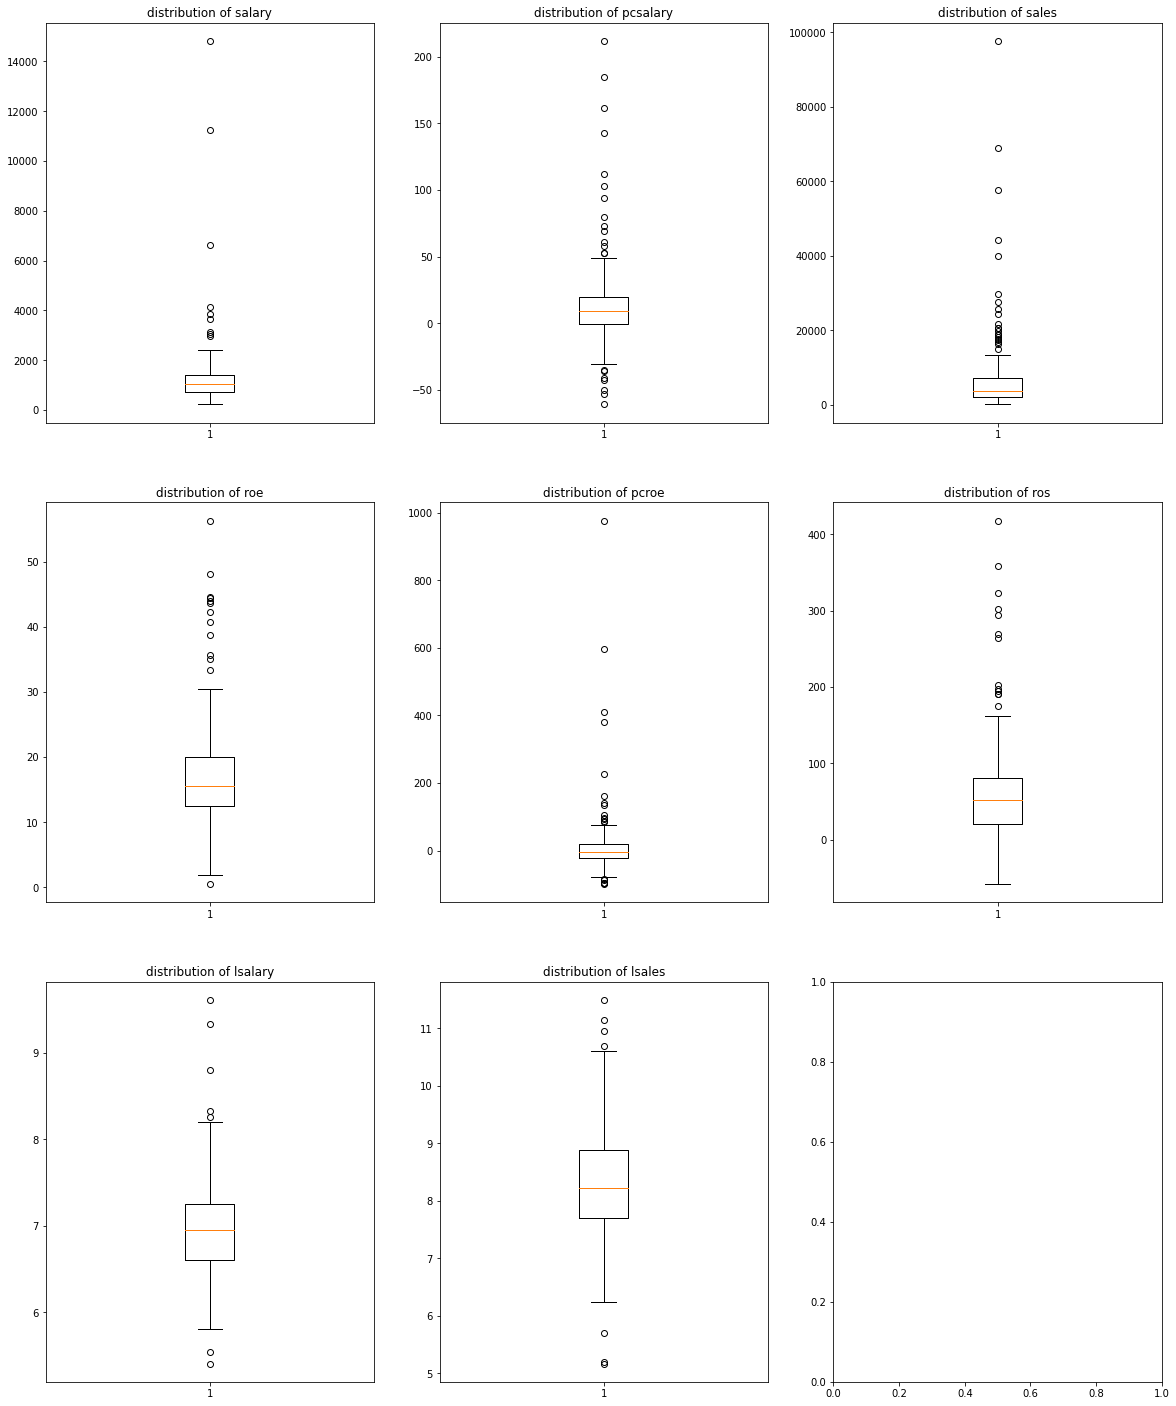

In [ ]:
# Plot the box plot of each numerical features
plt.rcParams["figure.figsize"] = (20,25)

fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i,j].boxplot(df[num_features[cnt]])
        axs[i,j].set_title('distribution of '+ num_features[cnt])
        cnt +=1

After eda some features, we realize the salary and sales data follow normalized distribution, so that these features are useful for our model than ['salary', 'sales']

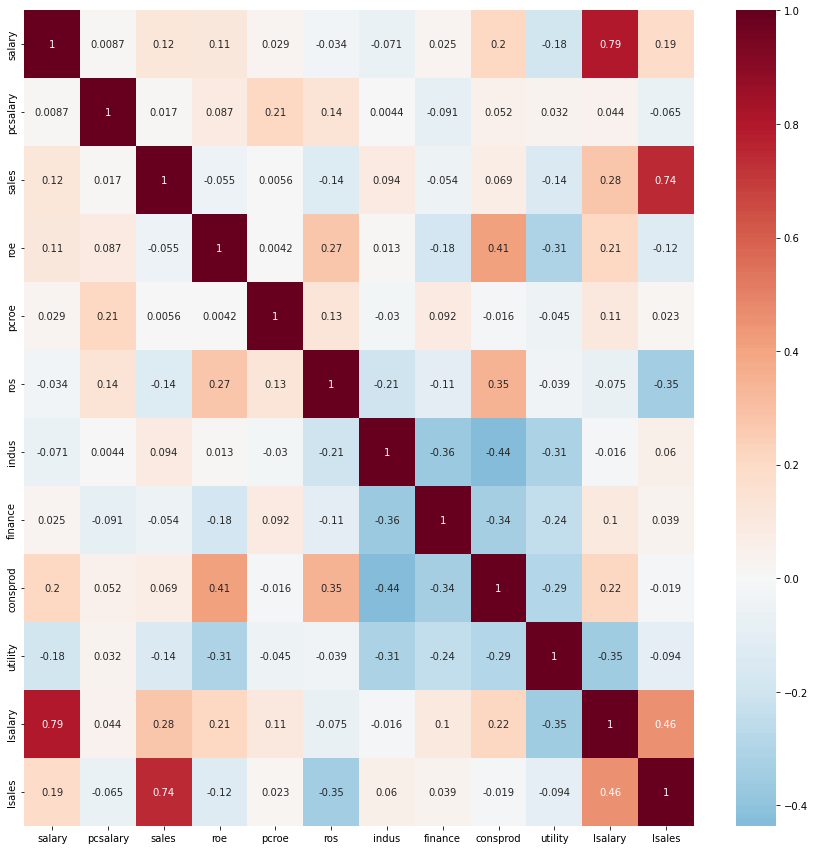

In [ ]:
# Plot heatmap to see all of the correlated features

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

IndexError: ignored

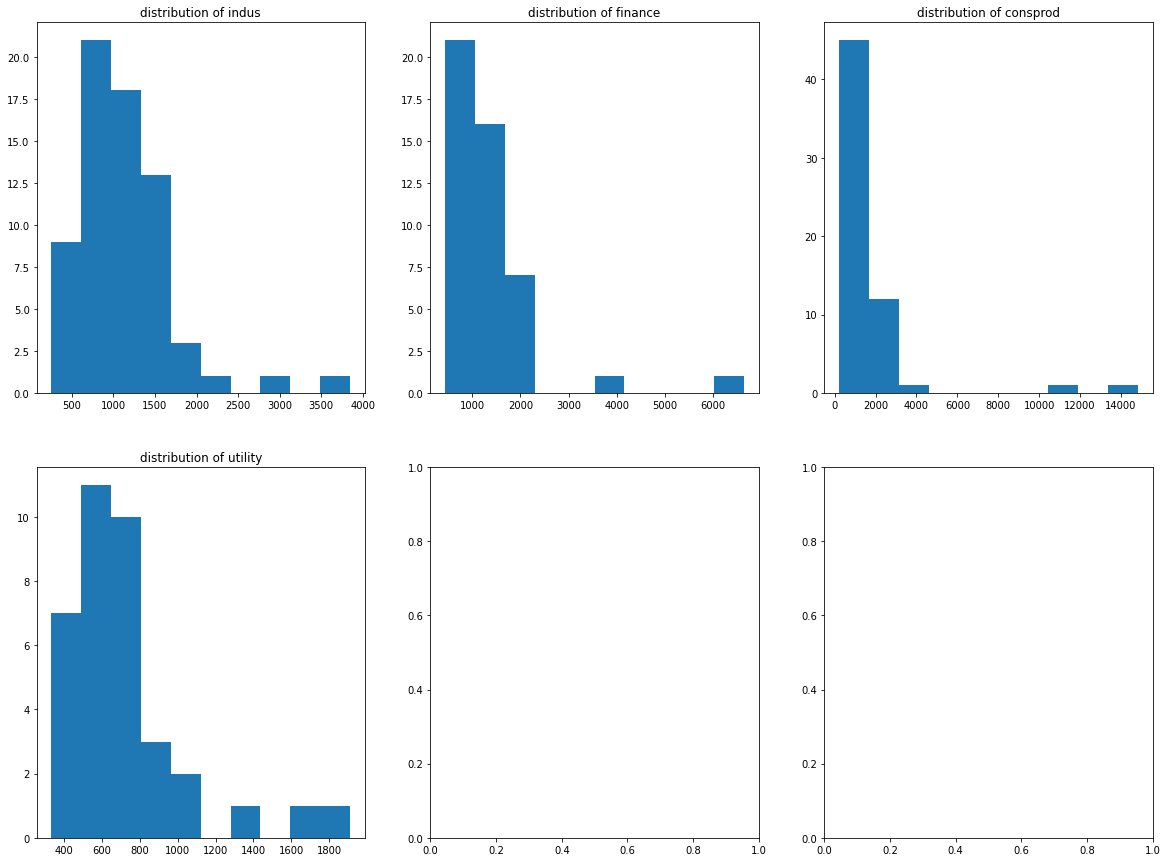

In [10]:
plt.rcParams["figure.figsize"] = (20,15)

fig, axs = plt.subplots(2, 3)
cnt = 0
for i in range(2):
    for j in range(3):
        axs[i,j].hist(df[df[cat_features[cnt]]==1]['salary'])
        axs[i,j].set_title('distribution of '+ cat_features[cnt])
        cnt +=1

# Preprocessing


## Regression analysis

In [13]:
# Update num_features
num_features = [col for col in num_features if col not in ['salary','lsalary','sales']]

In [14]:
# Assign tareet 'lsalary' variable in to y
# X is asigned numerical features

y = df['lsalary']
X = df[num_features]

In [30]:
# Remove columns ['salary', 'sales'] out of dataset, asign dataframe into _df
df = df[[col for col in list(df.columns) if col not in ['salary', 'sales', 'lsalary']]]

In [15]:
# Fit model with only numerical features 
#instantiation
reg = sm.OLS(y, X).fit()

#launching the modelling process
# res = reg.fit()

#detailed results
print(reg.summary())


                                 OLS Regression Results                                
Dep. Variable:                lsalary   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              4515.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):                   1.02e-206
Time:                        10:13:23   Log-Likelihood:                         -209.69
No. Observations:                 209   AIC:                                      429.4
Df Residuals:                     204   BIC:                                      446.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [141]:
print(dir(reg))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params'

In [16]:
# Assign all of columns name of _df into _X except target variable
_X = df[num_features + cat_features]

In [17]:
# Fit model with both types of feature
#instantiation
_reg = sm.OLS(y, _X).fit()

#launching the modelling process
# res = reg.fit()

#detailed results
print(_reg.summary())


                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     14.46
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           1.37e-16
Time:                        10:14:01   Log-Likelihood:                -129.54
No. Observations:                 209   AIC:                             277.1
Df Residuals:                     200   BIC:                             307.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
indus          4.6176      0.316     14.610      0.0

From 2 regeression analysis, we realize the categorical features have an strong 
impacting on the model
=> We can not drop categorical features out of model

## Outliers analysis

### Model assumption

In [ ]:
# Model assumption
JB, JBpv,skw,kurt = sm.stats.stattools.jarque_bera(reg.resid)
print(JB,JBpv,skw,kurt)

625.2772921490692 1.6701719290485471e-136 1.7160974988124804 10.747400505147938


In [ ]:
plt.figure(figsize=(5,5))

#qqpolot vs. normal distribution
sm.qqplot(_reg.resid)

In [ ]:
#graphical representation of the influences()
# sm.graphics.influence_plot(reg)
sm.graphics.influence_plot(_reg)

***NOTE:*** After 2 types of graph above, we confirm that ***categorical features*** do not ...

### Outliers analysis

In [19]:
# object for the analysis of influential points
infl = _reg.get_influence()

# members
# print(dir(infl))

In [20]:
# cooks_distance is an attribute of incluence, here C, not sure about P (p-value maybe?)
C = infl.cooks_distance[0]

In [34]:
_cook_threshold = 4/(len(df)-len(list(df))-3)
cook_threshold = 4/len(df)
print(cook_threshold, _cook_threshold)

0.019138755980861243 0.02030456852791878


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, "Cook's Distance")

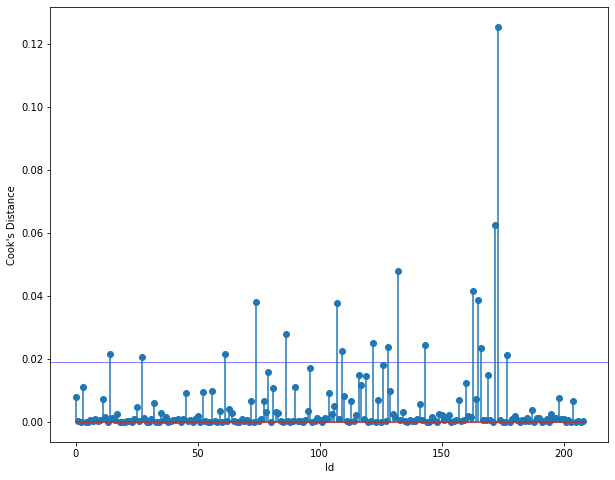

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.stem(C)
# plt.plot(C)
plt.axhline(y=cook_threshold,xmin=0,xmax=1,c="blue",linewidth=0.5,zorder=0)
plt.xlabel('Id')
plt.ylabel("Cook's Distance")

In [32]:
p = len(_X.columns)
n = len(df)

leviers = infl.hat_matrix_diag #leverage
sigma_err = np.sqrt(_reg.scale) #regression standard error

#threshold leverage
threshold_levier = 2*(p+1)/n
print(threshold_levier)
#identification
atyp_levier = leviers > threshold_levier
np.unique(atyp_levier)

0.09569377990430622


array([False,  True])

In [33]:
res_studs = infl.resid_studentized_external #Externally studentized residual
#threshold externally studentized residuals
threshold_stud = scipy.stats.t.ppf(0.975,df=n-p-2)
print(threshold_stud)
#detection - absolute value > threshold
atyp_stud = np.abs(res_studs) > threshold_stud
#which ones?
print(df.index[atyp_stud],res_studs[atyp_stud])

1.9720174778338955
Int64Index([27, 61, 81, 86, 107, 126, 132, 160, 163, 165, 172, 173], dtype='int64') [ 2.09664996 -2.01725381 -1.99513564  3.2075254   3.58354035 -2.43120124
 -2.09488087  2.11462073  4.75389271  2.84247719 -2.08274921  6.43937509]


In [31]:
# suspicious observations with one of the two criteria
pbm_infl = np.logical_or(atyp_levier,atyp_stud)
print(df.index[pbm_infl])

#Other criteria for detecting influential points
temp_infl = infl.summary_frame().filter(["hat_diag","student_resid","dffits","cooks_d"])
print(temp_infl.loc[pbm_infl,:])

Int64Index([ 14,  27,  31,  59,  61,  74,  79,  81,  86,  96, 107, 114, 126,
            128, 132, 141, 143, 160, 163, 165, 166, 169, 172, 173],
           dtype='int64')
     hat_diag  student_resid    dffits   cooks_d
14   0.151144       1.048726  0.442528  0.021748
27   0.041019       2.096650  0.433624  0.020543
31   0.112232      -0.250322 -0.089004  0.000884
59   0.204344      -0.342916 -0.173782  0.003370
61   0.046340      -2.017254 -0.444676  0.021639
74   0.525577      -0.556148 -0.585363  0.038204
79   0.250051      -0.655296 -0.378387  0.015954
81   0.023872      -1.995136 -0.312009  0.010658
86   0.024947       3.207525  0.513060  0.027950
96   0.123131      -1.045503 -0.391780  0.017047
107  0.027191       3.583540  0.599112  0.037652
114  0.132963       0.144034  0.056404  0.000355
126  0.027297      -2.431201 -0.407275  0.017989
128  0.168246      -1.028600 -0.462617  0.023772
132  0.091090      -2.094881 -0.663186  0.048054
141  0.149059      -0.543070 -0.227293  0.005

***NOTE:*** Detecting outliers or influential points is one thing, dealing them is another. Indeed, 
we cannot remove them systematically. It is necessary to identify why an observation is 
problematic and thus to determine the most appropriate solution, which may be deletion, 
but not systematically. For instance, let us take a simple situation. A point can be atypical 
because it takes an unusual value on a variable. If the variable selection process leads to its 
exclusion from the model, what should be done then? Re-enter the point? Leave as is? There 
is no pre-determined solution. The modelling process is exploratory in nature.*italicized text*

## [DRAFT] Remove outliers 

IndexError: list index out of range

<Figure size 1440x1800 with 0 Axes>

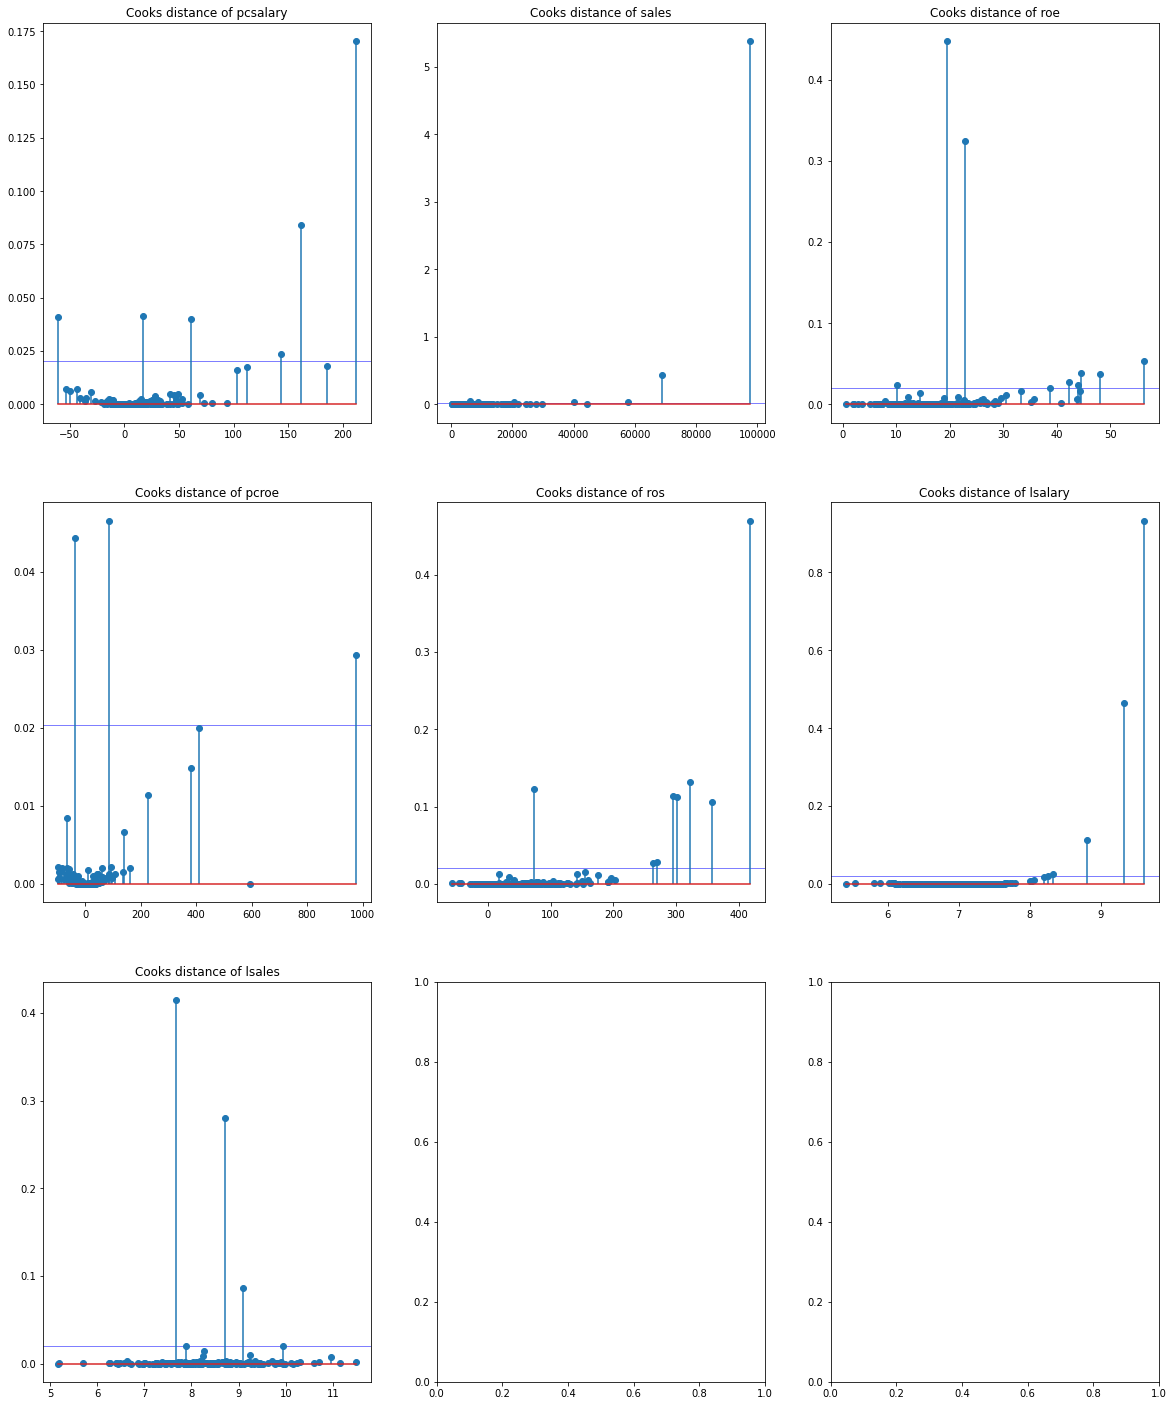

In [ ]:
cook_threshold = 4/(len(df)-len(list(df))-1)
y = df['salary']
fig = plt.figure()

plt.rcParams["figure.figsize"] = (20,25)

fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(4):
    for j in range(3):
        #fit linear regression model
        model = sm.OLS(y, df[num_features[cnt]]).fit()
        
        #suppress scientific notation
        np.set_printoptions(suppress=True)
        
        #create instance of influence
        influence = model.get_influence()
        
        #obtain Cook's distance for each observation
        cooks = influence.cooks_distance
        
        axs[i,j].stem(df[num_features[cnt]], cooks[0])
        axs[i,j].set_title('Cooks distance of '+ num_features[cnt])
        axs[i,j].axhline(y=cook_threshold,xmin=0,xmax=1,c="blue",linewidth=0.5,zorder=0)
#         axs[i,j].add_artist(lines.Line2D([0, cook_threshold], [np.max(df[num_features[cnt]]), 0]))
        cnt +=1

In [ ]:
len(cooks[0])

209

## Feature selection

In [52]:
# split train, test set from dataset include cat_features
_X_train, _X_test, y_train, y_test = train_test_split(_X, y, test_size=0.3, random_state=42)

In [36]:
num_pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
])
cat_pipe = Pipeline(steps=[
    ('encode', OneHotEncoder(drop='first')),
    ('scale', StandardScaler(with_mean=False)),
])

In [37]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe, num_features),
    ('cat', cat_pipe, cat_features),
], remainder='drop')

In [45]:
r2scores = []
adjustedr2 = []
feature_names = []
for i in range(1, 10):
    reduce_dim_pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('reduce_dim', SelectKBest(k=i, score_func=f_regression)),
    ])

    pipeline = Pipeline(steps=[
        ('reduce_dim_pipe', reduce_dim_pipe),
        ('regress', LinearRegression())
    ])

    # calculate cross validated R2
    R2 = cross_val_score(pipeline, X=_X_train, y=y_train, cv=10, scoring='r2').mean()
    r2scores.append(R2)

    # calculate Adj R2
    n = len(_X_train)
    p = i  # len(X.columns)
    adj_R2 = 1 - ((1 - R2) * (n - 1) / (n - p - 1))  # Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
    #     print(r2, adjustedr2)
    adjustedr2.append(adj_R2)

    reduce_dim_pipe.fit(X=_X_train, y=y_train)
    # Get columns to keep
    cols = reduce_dim_pipe.named_steps['reduce_dim'].get_support(indices=True)
    # Create new dataframe with only desired columns
    #     print(cols)
    features_df_new = _X_train.iloc[:, cols]
    best_features = list(features_df_new.columns)
    #     print(best_features)
    feature_names.append(best_features)

In [53]:
scoring_df = pd.DataFrame(np.column_stack((r2scores, adjustedr2)), columns=['R2', 'Adj_R2'])
scoring_df['feature_names'] = feature_names
scoring_df['features'] = range(1, 10)
scoring_df

,R2,Adj_R2,feature_names,features
0,0.138666,0.132685,[pcsalary],1
1,0.216160,0.205197,"[pcsalary, lsales]",2
2,0.240078,0.224023,"[pcsalary, ros, lsales]",3
3,0.290093,0.269954,"[finance, pcsalary, ros, lsales]",4
4,0.272393,0.246407,"[finance, consprod, pcsalary, ros, lsales]",5
5,0.272289,0.240877,"[indus, finance, consprod, pcsalary, ros, lsales]",6
6,0.293399,0.257557,"[indus, finance, consprod, pcsalary, roe, ros,...",7
7,0.300605,0.259764,"[indus, finance, consprod, pcsalary, roe, pcro...",8
8,0.291072,0.244158,"[indus, finance, consprod, utility, pcsalary, ...",9


Text(0.5, 1.0, 'Plot between number of features and R2/Adj R2 scores')

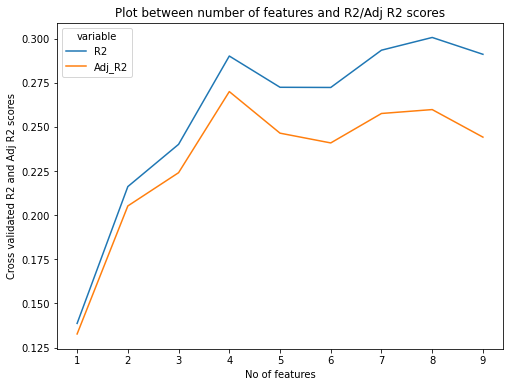

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))
#convert data frame from wide format to long format so that we can pass into seaborn line plot function to draw multiple line plots in same figure
# https://stackoverflow.com/questions/52308749/how-do-i-create-a-multiline-plot-using-seaborn
long_format_df = pd.melt(scoring_df.loc[:, ['features','R2', 'Adj_R2']], ['features'])
sns.lineplot(x='features', y='value', hue='variable', data=long_format_df, ax=ax)
ax.set_xlabel('No of features')
ax.set_ylabel('Cross validated R2 and Adj R2 scores')
ax.set_title('Plot between number of features and R2/Adj R2 scores')

# Model Building

The estimate of model performance via k-fold cross-validation can be noisy.

This means that each time the procedure is run, a different split of the dataset into k-folds can be implemented, and in turn, the distribution of performance scores can be different, resulting in a different mean estimate of model performance.

The amount of difference in the estimated performance from one run of k-fold cross-validation to another is dependent upon the model that is being used and on the dataset itself.

A noisy estimate of model performance can be frustrating as it may not be clear which result should be used to compare and select a final model to address the problem.

One solution to reduce the noise in the estimated model performance is to increase the k-value. This will reduce the bias in the model’s estimated performance, although it will increase the variance: e.g. tie the result more to the specific dataset used in the evaluation.

An alternate approach is to repeat the k-fold cross-validation process multiple times and report the mean performance across all folds and all repeats. This approach is generally referred to as repeated k-fold cross-validation.

Importantly, each repeat of the k-fold cross-validation process must be performed on the same dataset split into different folds.

Repeated k-fold cross-validation has the benefit of improving the estimate of the mean model performance at the cost of fitting and evaluating many more models.

Common numbers of repeats include 3, 5, and 10. For example, if 3 repeats of 10-fold cross-validation are used to estimate the model performance, this means that (3 * 10) or 30 different models would need to be fit and evaluated.

* Appropriate: for small datasets and simple models (e.g. linear).

In [58]:
# evaluate a logistic regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import RepeatedKFold
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold 
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [55]:
# split train, test set from dataset include cat_features
_X_train, _X_test, y_train, y_test = train_test_split(_X, y, test_size=0.3, random_state=42)

In [68]:
 _X_train.columns[]

Index(['indus', 'finance', 'consprod', 'utility', 'pcsalary', 'roe', 'pcroe',
       'ros', 'lsales'],
      dtype='object')

In [69]:
#Implementing cross validation
k = 10
kf = KFold(n_splits=k, random_state=None)
# model = LogisticRegression()
 
r2_sc = []
MSE_score = []
 
for train_index , val_index in kf.split(_X_train):
    X_tr , X_val = _X_train.iloc[train_index,5:8],_X_train.iloc[val_index,5:8]
    y_tr , y_val = y_train.iloc[train_index] , y_train.iloc[val_index]
     
    model = sm.OLS(y_tr, X_tr).fit()
    pred_values = model.predict(X_val)
     
    r2 = r2_score(y_val, pred_values)
    r2_sc.append(r2)
    MSE = mean_squared_error(y_val, pred_values)
    MSE_score.append(MSE)
avg_r2_score = sum(r2_sc)/k
avg_MSE_score = sum(MSE_score)/k
 
print('R-squared of each fold - {}'.format(r2_sc))
print('Avg R-squared : {}'.format(avg_r2_score))

R-squared of each fold - [-45.05368849208491, -31.449389914611885, -35.09114881056365, -7.664497289790518, -11.739144683707085, -49.26421894756902, -63.06014119146106, -22.75386423509352, -43.654806081411266, -105.21606316161152]
Avg R-squared : -41.49469628079045


# REFERENCES


https://mdsohelmahmood.github.io/2021/07/21/Cook's-Distance.html
https://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/en_Tanagra_Python_StatsModels.pdf
https://notebook.community/DistrictDataLabs/yellowbrick/examples/bbengfort/cooks_distance
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/




*   https://online.stat.psu.edu/stat501/book/export/html/973
*   https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm
*   https://cpb-us-e1.wpmucdn.com/blogs.rice.edu/dist/e/8375/files/2017/08/Lecture10-2n22q1q.pdf



* https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm

# Model test

In [64]:
temp_model = sm.OLS(y_train, _X_train[['lsales']]).fit()

In [66]:
y_pred = temp_model.predict(_X_test['lsales'])

In [67]:
r2_score(y_test, y_pred)

-0.3498879337307552

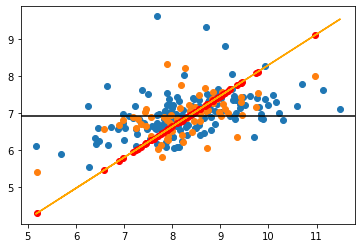

In [88]:
x = _X_train[['lsales']]
y = y_train
plt.scatter(x, y)
plt.plot(x, x*temp_model.params[0], color='orange')
plt.scatter(_X_test['lsales'], y_test)
plt.scatter(_X_test['lsales'], y_pred, color='red')
plt.axhline(avg_y_test, color='black')

In [86]:
avg_y_test = np.average(y_test)

In [116]:
temp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                lsalary   R-squared (uncentered):                   0.334
Model:                            OLS   Adj. R-squared (uncentered):              0.329
Method:                 Least Squares   F-statistic:                              72.68
Date:                Wed, 17 Nov 2021   Prob (F-statistic):                    1.82e-14
Time:                        09:43:30   Log-Likelihood:                         -461.32
No. Observations:                 146   AIC:                                      924.6
Df Residuals:                     145   BIC:                                      927.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
indus          6.8980      0.809      8.525      0.000       5.299       8.497
==============================================================================
Omnibus:                      599.569   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.322
Skew:                          -0.607   Prob(JB):                     1.42e-05
Kurtosis:                       1.518   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""